# Introduction
In this project we are going to explore a simple neural network implemented natively in sklearn. This dataset will be explored, cleaned, engineered, split, scaled, reduced, searched, and finally trained. We will then visualize the model several ways so we can gain insight on how this library and this particular model works with our data. 

# Standard Imports

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import data

In [286]:
data = pd.read_csv('https://raw.githubusercontent.com/TahlonBrahic/Data-Science-Portfolio/main/Data%20Science/Social%20Media%20Engagement%20Model/Twitterdatainsheets.csv')

C:\Users\tahlo\AppData\Local\Temp\ipykernel_25520\2890100033.py:1: DtypeWarning: Columns (3,4,5,6,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://raw.githubusercontent.com/TahlonBrahic/Data-Science-Portfolio/main/Data%20Science/Social%20Media%20Engagement%20Model/Twitterdatainsheets.csv')


# Exploratory Data Analysis

In [287]:
data

,index,TweetID,Weekday,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,text,LocationID,UserID
0,0,tw-682712873332805633,Thursday,17,31,en,False,44.0,0.0,0.0,35.0,0.0,We are hiring: Senior Software Engineer - Prot...,3751.0,tw-40932430
1,1,tw-682713045357998080,Thursday,17,31,en,True,1810.0,5.0,0.0,53.0,2.0,RT @CodeMineStatus: This is true Amazon Web Se...,3989.0,tw-3179389829
2,2,tw-682713219375476736,Thursday,17,31,en,False,282.0,0.0,0.0,47.0,0.0,Devops Engineer Aws Ansible Cassandra Mysql Ub...,3741.0,tw-4624808414
3,3,tw-682713436967579648,Thursday,17,31,en,False,2087.0,4.0,0.0,53.0,0.0,Happy New Year to all those AWS instances of o...,3753.0,tw-356447127
4,4,tw-682714048199311366,Thursday,17,31,en,False,953.0,0.0,0.0,47.0,0.0,Amazon is hiring! #Sr. #International Tax Mana...,3751.0,tw-3172686669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206290,206290,tw-443876086,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206291,206291,tw-565013710,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206292,206292,tw-322341885,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206293,206293,tw-3304550634,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [288]:
top_langs = data.groupby([' Lang'])[' Lang'].value_counts().sort_values(ascending=False)[:8]
top_langs

 Lang
en    91886
es     1700
fr     1085
tr      877
_u      861
ja      671
de      563
in      416
Name: count, dtype: int64

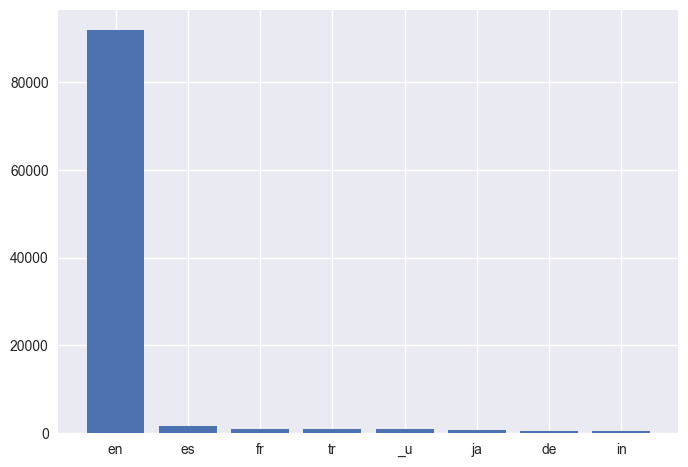

In [289]:
# from sklearn.preprocessing import StandardScaler
# top_langs_scaler = StandardScaler()
# top_langs_scaler.fit(top_langs)


plt.bar(top_langs.keys(), top_langs)
plt.show()

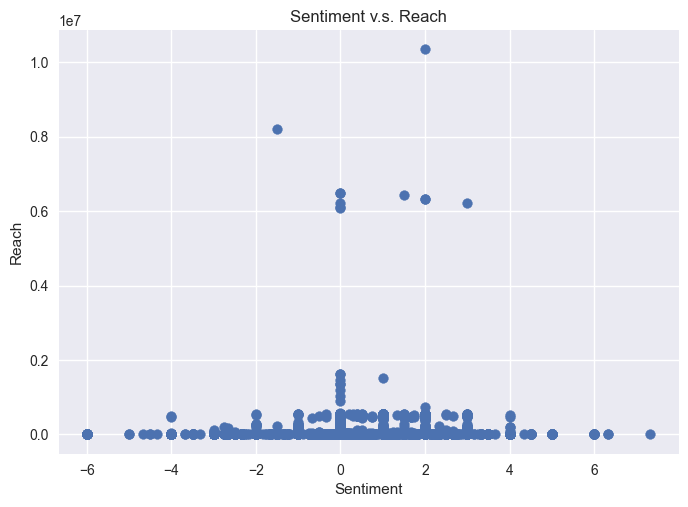

In [290]:
plt.scatter(data[" Sentiment"], data[' Reach'])
plt.title('Sentiment v.s. Reach')
plt.xlabel('Sentiment')
plt.ylabel('Reach')
plt.show()

# Data Scrubbing

The index is a duplicate so I am dropping it.

In [291]:
data = data.drop(columns=['index'])
data

,TweetID,Weekday,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,text,LocationID,UserID
0,tw-682712873332805633,Thursday,17,31,en,False,44.0,0.0,0.0,35.0,0.0,We are hiring: Senior Software Engineer - Prot...,3751.0,tw-40932430
1,tw-682713045357998080,Thursday,17,31,en,True,1810.0,5.0,0.0,53.0,2.0,RT @CodeMineStatus: This is true Amazon Web Se...,3989.0,tw-3179389829
2,tw-682713219375476736,Thursday,17,31,en,False,282.0,0.0,0.0,47.0,0.0,Devops Engineer Aws Ansible Cassandra Mysql Ub...,3741.0,tw-4624808414
3,tw-682713436967579648,Thursday,17,31,en,False,2087.0,4.0,0.0,53.0,0.0,Happy New Year to all those AWS instances of o...,3753.0,tw-356447127
4,tw-682714048199311366,Thursday,17,31,en,False,953.0,0.0,0.0,47.0,0.0,Amazon is hiring! #Sr. #International Tax Mana...,3751.0,tw-3172686669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206290,tw-443876086,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206291,tw-565013710,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206292,tw-322341885,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206293,tw-3304550634,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This file seems to include information that we aren't necesarrily going to use in a model. For that reason we are going to drop it.

In [292]:
data[' text']

0         We are hiring: Senior Software Engineer - Prot...
1         RT @CodeMineStatus: This is true Amazon Web Se...
2         Devops Engineer Aws Ansible Cassandra Mysql Ub...
3         Happy New Year to all those AWS instances of o...
4         Amazon is hiring! #Sr. #International Tax Mana...
                                ...                        
206290                                                  NaN
206291                                                  NaN
206292                                                  NaN
206293                                                  NaN
206294                                                  NaN
Name:  text, Length: 206295, dtype: object

In [293]:
data = data.drop(columns=[' text'])
data

,TweetID,Weekday,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,LocationID,UserID
0,tw-682712873332805633,Thursday,17,31,en,False,44.0,0.0,0.0,35.0,0.0,3751.0,tw-40932430
1,tw-682713045357998080,Thursday,17,31,en,True,1810.0,5.0,0.0,53.0,2.0,3989.0,tw-3179389829
2,tw-682713219375476736,Thursday,17,31,en,False,282.0,0.0,0.0,47.0,0.0,3741.0,tw-4624808414
3,tw-682713436967579648,Thursday,17,31,en,False,2087.0,4.0,0.0,53.0,0.0,3753.0,tw-356447127
4,tw-682714048199311366,Thursday,17,31,en,False,953.0,0.0,0.0,47.0,0.0,3751.0,tw-3172686669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206290,tw-443876086,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206291,tw-565013710,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206292,tw-322341885,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206293,tw-3304550634,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
data.columns

Index(['TweetID', ' Weekday', ' Hour', ' Day', ' Lang', ' IsReshare', ' Reach',
       ' RetweetCount', ' Likes', ' Klout', ' Sentiment', ' LocationID',
       ' UserID'],
      dtype='object')

In [295]:
data.isna().sum()

TweetID               4
 Weekday              3
 Hour            100120
 Day             100114
 Lang            100162
 IsReshare       106295
 Reach           106295
 RetweetCount    106295
 Likes           106295
 Klout           106295
 Sentiment       106295
 LocationID      106295
 UserID          106295
dtype: int64

Because these columns contain an equal aount of missing data it is safe to assume they are the same rows therefore I am going to drop them all. 

In [296]:
data = data.dropna()

Right now I do not have a need for Tweet ID so I am also going to drop it, I do not see how it can add anything useful to the model.

In [297]:
data = data.drop(columns=['TweetID'])


In [298]:
data = data.drop(columns=[' UserID'])

In [299]:
data = data.drop(columns=[' LocationID'])

Now that we have the columns we will use we need to verify the proper data types of the columns

In [300]:
data

,Weekday,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment
0,Thursday,17,31,en,False,44.0,0.0,0.0,35.0,0.0
1,Thursday,17,31,en,True,1810.0,5.0,0.0,53.0,2.0
2,Thursday,17,31,en,False,282.0,0.0,0.0,47.0,0.0
3,Thursday,17,31,en,False,2087.0,4.0,0.0,53.0,0.0
4,Thursday,17,31,en,False,953.0,0.0,0.0,47.0,0.0
...,...,...,...,...,...,...,...,...,...,...
99995,Saturday,13,2,hi,True,1143.0,1.0,0.0,49.0,1.0
99996,Saturday,13,2,en,False,763.0,0.0,0.0,29.0,0.0
99997,Saturday,13,2,en,True,122.0,435.0,0.0,17.0,1.0
99998,Saturday,13,2,en,True,287.0,30.0,0.0,42.0,0.0


It appears that Hour, Day, and IsReshare are being detected as as objects when they should be detected as int, int, and boolean respectively. Likewise I think that all the other numbers should be ints.

In [301]:
data.dtypes

 Weekday          object
 Hour             object
 Day              object
 Lang             object
 IsReshare        object
 Reach           float64
 RetweetCount    float64
 Likes           float64
 Klout           float64
 Sentiment       float64
dtype: object

Before we rename datatypes we are going to change column names as they have spaces in them.

In [302]:
correct_columns=['Weekday','Hour','Day', 'Lang', 'IsReshare', 'Reach', 'RetweetCount', 'Likes', 'Klout', 'Sentiment']
data = data.set_axis(correct_columns, axis=1)
data.columns

Index(['Weekday', 'Hour', 'Day', 'Lang', 'IsReshare', 'Reach', 'RetweetCount',
       'Likes', 'Klout', 'Sentiment'],
      dtype='object')

Now we can modify datatypes.

In [303]:
integer_columns = ['Hour', 'Day', 'Reach', 'RetweetCount', 'Likes', 'Klout'] # Missing sentiment
data[integer_columns] = data[integer_columns].apply(pd.to_numeric, errors='coerce')
data[integer_columns] = data[integer_columns].astype('Int32')
data


,Weekday,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment
0,Thursday,17,31,en,False,44,0,0,35,0.0
1,Thursday,17,31,en,True,1810,5,0,53,2.0
2,Thursday,17,31,en,False,282,0,0,47,0.0
3,Thursday,17,31,en,False,2087,4,0,53,0.0
4,Thursday,17,31,en,False,953,0,0,47,0.0
...,...,...,...,...,...,...,...,...,...,...
99995,Saturday,13,2,hi,True,1143,1,0,49,1.0
99996,Saturday,13,2,en,False,763,0,0,29,0.0
99997,Saturday,13,2,en,True,122,435,0,17,1.0
99998,Saturday,13,2,en,True,287,30,0,42,0.0


The only thing missing now number wise is the sentiment column. We need to make sure that it is supposed to be a float because pandas would not let us convert it to an integer.

In [304]:
data.Sentiment.value_counts()

Sentiment
 0.000000    67424
 1.000000     8771
 2.000000     8587
 3.000000     3945
-1.000000     1770
             ...  
 0.164000        1
-0.271462        1
 0.186667        1
-0.140000        1
 0.136351        1
Name: count, Length: 309, dtype: int64

This shows that the sentiment feature is much more than just a simple integer therefore we will keep it as a float.

The next feature we will analyze is the IsReshare column. Pandas detected it as a object but it should be a boolean.

In [305]:
data.IsReshare = data.IsReshare.astype('bool')

Now to make Weekday a category for encoding reasons.

In [306]:
data.Weekday = data.Weekday.astype('category')

In [307]:
language_names = [
    "English",
    "Spanish",
    "French",
    "Turkish",
    "Unknown",  # or "Unspecified" for '_u'
    "Japanese",
    "German",
    "Indonesian",
    "Tagalog",
    "Korean",
    "Portuguese",
    "Dutch",
    "Italian",
    "Chinese",
    "Thai",
    "Polish",
    "Czech",
    "Russian",
    "Finnish",
    "Estonian",
    "Romanian",
    "Haitian Creole",
    "Danish",
    "Swedish",
    "Welsh",
    "Arabic",
    "Hungarian",
    "Norwegian",
    "Lithuanian",
    "Latvian",
    "Hindi",
    "Ukrainian",
    "Slovenian",
    "Hebrew",
    "Basque",
    "Khmer"
]

data.Lang = data.Lang.astype('category')
data.Lang = data.Lang.cat.rename_categories(language_names)
data.Lang


0         German
1         German
2         German
3         German
4         German
          ...   
99995    Italian
99996     German
99997     German
99998     German
99999     German
Name: Lang, Length: 100000, dtype: category
Categories (36, object): ['English', 'Spanish', 'French', 'Turkish', ..., 'Slovenian', 'Hebrew', 'Basque', 'Khmer']

Finally I am going to make IsReshare into an integer for the same continuity.

In [308]:
data.IsReshare = data.IsReshare.astype('Int32')
data

,Weekday,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment
0,Thursday,17,31,German,0,44,0,0,35,0.0
1,Thursday,17,31,German,1,1810,5,0,53,2.0
2,Thursday,17,31,German,0,282,0,0,47,0.0
3,Thursday,17,31,German,0,2087,4,0,53,0.0
4,Thursday,17,31,German,0,953,0,0,47,0.0
...,...,...,...,...,...,...,...,...,...,...
99995,Saturday,13,2,Italian,1,1143,1,0,49,1.0
99996,Saturday,13,2,German,0,763,0,0,29,0.0
99997,Saturday,13,2,German,1,122,435,0,17,1.0
99998,Saturday,13,2,German,1,287,30,0,42,0.0


# Data Engineering

In [309]:
from sklearn.preprocessing import OneHotEncoder

weekday_ohe = OneHotEncoder(sparse_output=False)
weekdays = np.array(data.Weekday).reshape(-1,1)
weekday_encoded = weekday_ohe.fit_transform(weekdays)
weekday_names = weekday_ohe.get_feature_names_out(['Weekday'])
weekdays = pd.DataFrame(weekday_encoded, columns=weekday_names)
weekdays = weekdays.astype('Int32')
data = data.drop(columns=['Weekday'])
data = data.join(weekdays)

In [310]:
data

,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,17,31,German,0,44,0,0,35,0.0,0,0,0,0,1,0,0
1,17,31,German,1,1810,5,0,53,2.0,0,0,0,0,1,0,0
2,17,31,German,0,282,0,0,47,0.0,0,0,0,0,1,0,0
3,17,31,German,0,2087,4,0,53,0.0,0,0,0,0,1,0,0
4,17,31,German,0,953,0,0,47,0.0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,13,2,Italian,1,1143,1,0,49,1.0,0,0,1,0,0,0,0
99996,13,2,German,0,763,0,0,29,0.0,0,0,1,0,0,0,0
99997,13,2,German,1,122,435,0,17,1.0,0,0,1,0,0,0,0
99998,13,2,German,1,287,30,0,42,0.0,0,0,1,0,0,0,0


In [311]:
lang_ohe = OneHotEncoder(sparse_output=False)
languages = np.array(data.Lang).reshape(-1,1)
languages_encoded = lang_ohe.fit_transform(languages)
language_names = lang_ohe.get_feature_names_out(['Lang'])
languages = pd.DataFrame(languages_encoded, columns=language_names)
languages = languages.astype('Int32')
data = data.drop(columns=['Lang'])
data = data.join(languages)

# Train, Test, Split & Define Features V.S. Response
In this model we are trying to predict sentiment from the rest of the data. Therefore sentiment is the response and all the others are the features.

In [312]:
from sklearn.model_selection import train_test_split

features = data.drop(columns=('Sentiment'))
response = data[['Sentiment']]

X_train, X_test, y_train, y_test = train_test_split(features, response)

# Data Scaling


In [313]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scalable_columns = ['Hour', 'Day', 'Reach', 'Klout']

X_train_scaled = scaler.fit_transform(X_train[scalable_columns])
X_test_scaled = scaler.transform(X_test[scalable_columns])

scaled_column_names = scaler.get_feature_names_out()
 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=scaled_column_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=scaled_column_names)

X_train_missing_columns = X_train.drop(columns=scalable_columns)
X_test_missing_columns = X_test.drop(columns=scalable_columns)

X_train_scaled = X_train_scaled.join(X_train_missing_columns)
X_test_scaled = X_test_scaled.join(X_test_missing_columns)

# Dimensionality Reduction

In [314]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pca.explained_variance_ratio_

array([9.99998865e-01, 1.10306637e-06, 1.95646037e-08, 7.69835166e-09,
       4.00851714e-09, 6.66967100e-10, 2.45448606e-11])

# Random Search

In [315]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

# nn_regressor = MLPRegressor()

# param_grid = {
#     'solver': ['adam'],
#     'activation': ['relu'],
#     'random_state': [42],
#     # 'hidden_layers_sizes': (50,),
#     'early_stopping': [True, False],
#     'learning_rate_init' : [0.001, 0.002, 0.003, 0.004],
#     'max_iter': [x + 100 for x in range(0, 1000, 100)]
# }

# nn_regressor = RandomizedSearchCV(nn_regressor, param_grid, random_state=42)
# search = nn_regressor.fit(X_train, y_train)
# search.best_params_

# Neural Network

In [316]:
optimized_nn_regressor = MLPRegressor(hidden_layer_sizes=(20,15,10,5), solver='adam', random_state=42, max_iter=100, 
                                      learning_rate_init=0.0001, early_stopping=True, activation='relu',
                                      alpha=.01)
optimized_nn_regressor.fit(X_train, y_train)

c:\Users\tahlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(alpha=0.01, early_stopping=True,
             hidden_layer_sizes=(20, 15, 10, 5), learning_rate_init=0.0001,
             max_iter=100, random_state=42)

# Model Accuracy

In [317]:
from sklearn.metrics import r2_score

model_predictions = optimized_nn_regressor.predict(X_test)
r2 = r2_score(np.array(y_test), model_predictions)
r2

-0.45425908589230235

# Visulization of the Model

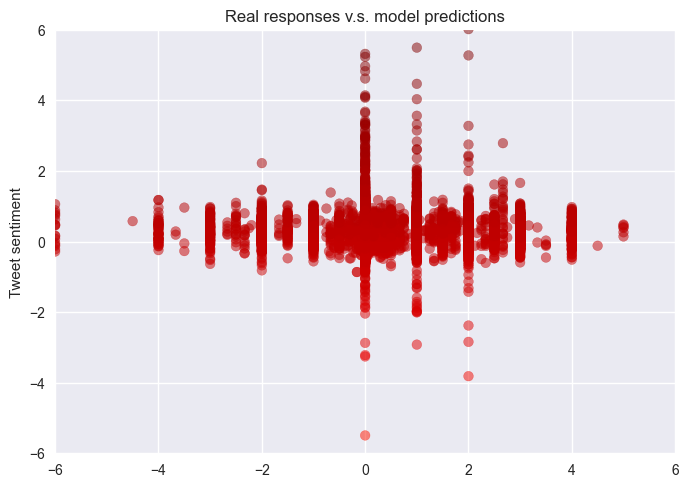

In [318]:
plt.style.use('seaborn-v0_8')
plt.scatter(y_test, model_predictions, c=model_predictions, cmap='jet', alpha=.5)
plt.xlim((-6,6))
plt.ylim((-6,6))
plt.title("Real responses v.s. model predictions")
plt.ylabel('Tweet sentiment')
plt.show()

# Conlusion

Overall this model can predict with a high degree of certainty the sentiment of a tweet based on multiple features of said tweet.